In [114]:
import pandas as pd

In [115]:
from datetime import datetime

In [116]:
import numpy as np

In [117]:
import matplotlib

In [118]:
import matplotlib.pyplot as plt

In [119]:
%matplotlib inline

In [120]:
df = pd.read_csv('NursingData.csv')

In [121]:
headers = list(df.columns.values)

In [122]:
newhead = []

In [123]:
for name in headers:
    newhead.append(name.strip())

In [124]:
newhead

['#',
 'time',
 'Left',
 'Right',
 'Bottle',
 'Bottle Amount',
 'Sleep time',
 'wet',
 'solid',
 'Pump Amount']

In [125]:
df.columns = newhead

In [126]:
df[:8]

,#,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount
0,1,06/21/15 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN
1,2,06/21/15 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN
2,3,06/21/15 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN
3,4,06/21/15 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN
4,5,06/21/15 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN
5,6,06/21/15 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN
6,7,06/21/15 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN
7,8,06/21/15 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN


In [127]:
df.dtypes

#                 int64
time             object
Left             object
Right            object
Bottle           object
Bottle Amount    object
Sleep time       object
wet              object
solid            object
Pump Amount      object
dtype: object

In [128]:
df['time'] = pd.to_datetime(df['time'])

In [129]:
ordered = df.sort_values('time')

In [130]:
ordered[:8]

,#,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount
3234,1,2015-05-31 00:48:35,,,,,,O,-,NaN
0,1,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN
3235,2,2015-06-21 01:17:27,,,,,,O,O,NaN
2560,1,2015-06-21 01:19:50,,,,,0:39:28,NaN,NaN,NaN
1,2,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN
2561,2,2015-06-21 02:08:15,,,,,0:29:40,NaN,NaN,NaN
2,3,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN
2562,3,2015-06-21 02:52:03,,,,,1:30:3,NaN,NaN,NaN


In [131]:
def convmmss(mmss):
    minlist = []
    for value in mmss:
        if len(value) == 1:
            value = [float('NaN'),float('NaN')]
        else:
            if int(value[1]) < 10:
                value[1] = value[1] + '0'
        minutes = float(value[0]) + float(value[1])/60.
        minlist.append(minutes)
    minarr = np.array(minlist)
    return minarr

In [132]:
leftmin = convmmss(df['Left'].str.split(':'))

In [133]:
leftadj = np.where(leftmin > 45, 15., leftmin)

In [134]:
rightmin = convmmss(df['Right'].str.split(':'))

In [135]:
rightadj = np.where(rightmin > 45, 15., rightmin)

In [136]:
bottime = np.where(df['Bottle'] == ' Bottle-Pump',5.,0.)

In [137]:
bottime[1000:1200]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
        0.,  0.,  0.,  0.,  5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [138]:
totfeed = leftmin + rightmin + bottime

In [139]:
totadj = leftadj + rightadj + bottime

In [140]:
totfeed[1000:1050]

array([  15.        ,   23.61666667,   67.25      ,   11.48333333,
         17.95      ,   21.3       ,  101.43333333,   15.        ,
         19.76666667,   15.        ,    5.        ,   15.9       ,
         15.        ,   15.        ,   20.66666667,   15.        ,
         15.        ,   15.41666667,   14.5       ,   15.        ,
         13.16666667,   26.43333333,   11.46666667,   30.        ,
          9.51666667,   15.        ,   15.        ,   24.98333333,
         20.        ,   22.21666667,   19.35      ,   15.        ,
         15.        ,   15.        ,   15.        ,   17.8       ,
         16.25      ,    8.61666667,   16.61666667,   17.2       ,
         12.83333333,   11.9       ,   15.        ,   17.71666667,
         17.66666667,   15.        ,   15.        ,   15.        ,
         19.33333333,   15.        ])

In [141]:
df.loc[:,'Total Feed'] = pd.Series(totadj, index = df.index)

In [142]:
df.loc[:,'leftfeed'] = pd.Series(leftadj, index = df.index)
df.loc[:,'rightfeed'] = pd.Series(rightadj, index = df.index)


In [143]:
del df['#']

In [144]:
df[:8]

,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount,Total Feed,leftfeed,rightfeed
0,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN,1.300000,0.000000,1.300000
1,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN,7.516667,7.516667,0.000000
2,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN,14.500000,14.500000,0.000000
3,2015-06-21 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN,20.000000,0.000000,20.000000
4,2015-06-21 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN,22.183333,22.183333,0.000000
5,2015-06-21 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN,15.833333,0.000000,15.833333
6,2015-06-21 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN,13.616667,13.616667,0.000000
7,2015-06-21 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN,9.666667,0.000000,9.666667


In [145]:
df['time'][0].strftime('%Y')

'2015'

In [146]:
month = []

In [147]:
year = []

In [148]:
timeofday = []

In [149]:
for times in df['time']:
    month.append(times.strftime('%m'))
    year.append(times.strftime('%Y'))

In [150]:
for time in df['time']:
    if int(time.strftime('%H')) <= 6:
        timeofday.append('Late night')
    elif 6 < int(time.strftime('%H')) <= 12:
        timeofday.append('Morning')
    elif 12 < int(time.strftime('%H')) <= 18:
        timeofday.append('Afternoon')
    elif 18 <= int(time.strftime('%H')):
        timeofday.append('Evening')

In [151]:
df['Month'] = month

In [152]:
df['Year'] = year

In [153]:
df['Time of Day'] = timeofday

In [154]:
monthly = df.groupby([df['Year'],df['Month']])

In [155]:
monthly.mean()

Total Feed  leftfeed  rightfeed
Year Month                                 
2015 05            NaN       NaN        NaN
     06      17.883868  9.363996   8.519872
     07      17.367562  8.602220   8.753660
     08      17.109870  8.403593   8.602381
     09      17.498765  8.319907   8.993673
     10      16.128008  7.780966   8.095562
     11      14.943805  7.980138   6.771927
     12      15.042160  7.895957   6.850345
2016 01      15.609127  8.173479   7.376124

In [156]:
monthly.describe()

Total Feed    leftfeed   rightfeed
Year Month                                          
2015 05    count    0.000000    0.000000    0.000000
           mean          NaN         NaN         NaN
           std           NaN         NaN         NaN
           min           NaN         NaN         NaN
           25%           NaN         NaN         NaN
           50%           NaN         NaN         NaN
           75%           NaN         NaN         NaN
           max           NaN         NaN         NaN
     06    count  156.000000  156.000000  156.000000
           mean    17.883868    9.363996    8.519872
           std      8.285943    9.973715    9.981003
           min      1.300000    0.000000    0.000000
           25%     12.500000    0.000000    0.000000
           50%     15.416667    9.416667    4.150000
           75%     20.762500   16.170833   15.000000
           max     57.600000   40.916667   39.300000
     07    count  428.000000  428.000000  428.000000
           mean    17.367562    8.602220    8.753660
           std      8.440938    9.180466    9.398947
           min      0.333333    0.000000    0.000000
           25%     12.437500    0.000000    0.000000
           50%     15.000000    8.208333    8.466667
           75%     20.000000   15.000000   15.000000
           max     50.000000   43.950000   44.666667
     08    count  385.000000  385.000000  385.000000
           mean    17.109870    8.403593    8.602381
           std      8.253485    8.884654    9.342838
           min      0.000000    0.000000    0.000000
           25%     13.316667    0.000000    0.000000
           50%     15.000000    8.366667    8.366667
...                      ...         ...         ...
     10    std      7.132335    8.058134    8.604141
           min      0.500000    0.000000    0.000000
           25%     11.654167    0.000000    0.000000
           50%     15.000000    8.000000    7.583333
           75%     19.791667   15.000000   15.000000
           max     42.850000   40.166667   42.850000
     11    count  339.000000  339.000000  339.000000
           mean    14.943805    7.980138    6.771927
           std      7.202140    8.731328    8.076711
           min      0.166667    0.000000    0.000000
           25%      9.666667    0.000000    0.000000
           50%     15.000000    7.333333    5.000000
           75%     18.000000   15.000000   13.150000
           max     42.166667   42.166667   38.533333
     12    count  338.000000  338.000000  338.000000
           mean    15.042160    7.895957    6.850345
           std      7.722023    8.532760    7.553610
           min      1.450000    0.000000    0.000000
           25%     10.350000    0.000000    0.000000
           50%     15.000000    7.325000    5.941667
           75%     16.175000   14.750000   14.595833
           max     56.983333   44.366667   44.816667
2016 01    count  252.000000  252.000000  252.000000
           mean    15.609127    8.173479    7.376124
           std      5.636214    7.714664    7.581042
           min      0.000000    0.000000    0.000000
           25%     13.366667    0.000000    0.000000
           50%     15.000000    8.541667    7.133333
           75%     16.929167   15.000000   15.000000
           max     37.416667   31.666667   32.416667

[72 rows x 3 columns]

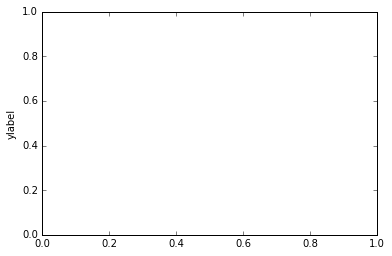

In [157]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.set_title=("Average Length of Feeding Time")
ax.set_ylabel('ylabel')


In [158]:
rm15 = df[df['Total Feed'] != 15.]

In [159]:
monthly_rm15 = rm15.groupby([df['Year'],df['Month']])

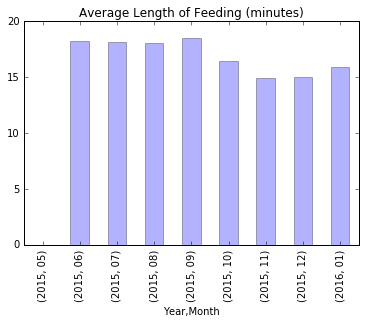

In [160]:
monthly_rm15['Total Feed'].mean().plot(kind='bar',color='b',alpha=0.3)
plt.title('Average Length of Feeding (minutes)')

In [161]:
df[:8]

,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount,Total Feed,leftfeed,rightfeed,Month,Year,Time of Day
0,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN,1.300000,0.000000,1.300000,06,2015,Late night
1,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN,7.516667,7.516667,0.000000,06,2015,Late night
2,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN,14.500000,14.500000,0.000000,06,2015,Late night
3,2015-06-21 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN,20.000000,0.000000,20.000000,06,2015,Late night
4,2015-06-21 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN,22.183333,22.183333,0.000000,06,2015,Late night
5,2015-06-21 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN,15.833333,0.000000,15.833333,06,2015,Late night
6,2015-06-21 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN,13.616667,13.616667,0.000000,06,2015,Morning
7,2015-06-21 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN,9.666667,0.000000,9.666667,06,2015,Morning


In [162]:
daytime = df.groupby("Time of Day")

In [163]:
data = pd.Series(df['Time of Day'])#, index = ['Morning','Afternoon','Evening','Late Night'])

In [164]:
data[:8]

0    Late night
1    Late night
2    Late night
3    Late night
4    Late night
5    Late night
6       Morning
7       Morning
Name: Time of Day, dtype: object

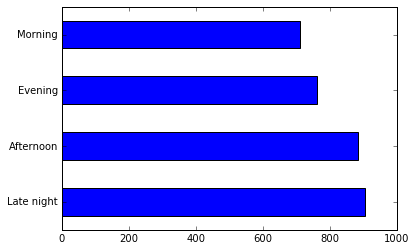

In [165]:
data.value_counts().plot(kind='barh')

In [166]:
timelen = pd.cut(df['Total Feed'], 5)

In [167]:
timelen[:5]

0    (-0.06, 12]
1    (-0.06, 12]
2       (12, 24]
3       (12, 24]
4       (12, 24]
Name: Total Feed, dtype: category
Categories (5, object): [(-0.06, 12] < (12, 24] < (24, 36] < (36, 48] < (48, 60]]

In [168]:
feedtime = pd.crosstab(df['Time of Day'],timelen)

In [169]:
feedtime

Total Feed,"(-0.06, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]"
Time of Day,,,,,
Afternoon,177,375,54,7,0
Evening,137,327,73,16,1
Late night,153,448,90,36,6
Morning,179,422,47,11,1


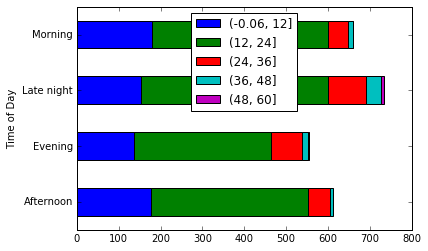

In [170]:
feedtime.plot(kind='barh', stacked = True)
plt.legend(loc='best')

In [231]:
df[:8]

,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount,Total Feed,leftfeed,rightfeed,Month,Year,Time of Day
0,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN,1.300000,0.000000,1.300000,06,2015,Late night
1,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN,7.516667,7.516667,0.000000,06,2015,Late night
2,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN,14.500000,14.500000,0.000000,06,2015,Late night
3,2015-06-21 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN,20.000000,0.000000,20.000000,06,2015,Late night
4,2015-06-21 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN,22.183333,22.183333,0.000000,06,2015,Late night
5,2015-06-21 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN,15.833333,0.000000,15.833333,06,2015,Late night
6,2015-06-21 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN,13.616667,13.616667,0.000000,06,2015,Morning
7,2015-06-21 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN,9.666667,0.000000,9.666667,06,2015,Morning


In [172]:
feeddf = pd.DataFrame({'time':df.time,'leftfeed':df.leftfeed,
                       'rightfeed':df.rightfeed, 'botfeed': bottime,
                       'totfeed':df['Total Feed'], 'month':df.Month,
                       'ToD':df['Time of Day'], 'year':df.Year})

In [173]:
feeddf = pd.DataFrame(df, columns=['time','Year','Month','Time of Day','leftfeed','rightfeed','Total Feed'])

In [174]:
feeddf[1010:1020]

,time,Year,Month,Time of Day,leftfeed,rightfeed,Total Feed
1010,2015-09-04 03:43:00,2015,09,Late night,0.000000,0.000000,5.000000
1011,2015-09-04 05:03:57,2015,09,Late night,15.900000,0.000000,15.900000
1012,2015-09-04 08:07:27,2015,09,Morning,0.000000,15.000000,15.000000
1013,2015-09-04 10:41:19,2015,09,Morning,15.000000,0.000000,15.000000
1014,2015-09-04 13:29:20,2015,09,Afternoon,20.666667,0.000000,20.666667
1015,2015-09-04 15:51:01,2015,09,Afternoon,0.000000,15.000000,15.000000
1016,2015-09-04 17:34:39,2015,09,Afternoon,15.000000,0.000000,15.000000
1017,2015-09-04 19:16:23,2015,09,Evening,0.000000,15.416667,15.416667
1018,2015-09-04 21:04:53,2015,09,Evening,14.500000,0.000000,14.500000
1019,2015-09-05 00:28:08,2015,09,Late night,0.000000,15.000000,15.000000


In [175]:
feeddf.insert(6,'botfeed',bottime)

In [176]:
ordered = feeddf.sort_values('time')

In [177]:
ordered[1010:1020]

,time,Year,Month,Time of Day,leftfeed,rightfeed,botfeed,Total Feed
927,2015-08-28 16:02:55,2015,08,Afternoon,0.000000,27.316667,0,27.316667
928,2015-08-28 18:05:22,2015,08,Afternoon,12.366667,0.000000,0,12.366667
929,2015-08-28 19:59:41,2015,08,Evening,0.000000,14.400000,0,14.400000
930,2015-08-28 21:27:10,2015,08,Evening,15.000000,0.000000,0,15.000000
931,2015-08-28 22:15:00,2015,08,Evening,0.000000,15.000000,0,15.000000
932,2015-08-29 02:11:07,2015,08,Late night,18.450000,0.000000,0,18.450000
933,2015-08-29 04:09:03,2015,08,Late night,0.000000,15.000000,0,15.000000
934,2015-08-29 07:40:51,2015,08,Morning,15.000000,0.000000,0,15.000000
935,2015-08-29 09:19:23,2015,08,Morning,15.000000,0.000000,0,15.000000
936,2015-08-29 11:13:34,2015,08,Morning,0.000000,14.500000,0,14.500000


In [178]:
del feeddf['botfeed']

In [179]:
df.solid.value_counts()

 O    20
 -    13
       3
Name: solid, dtype: int64

In [223]:
df['Bottle Amount'][2000:2012]

2000          
2001          
2002          
2003          
2004          
2005          
2006          
2007          
2008          
2009     4.5oz
2010       2oz
2011     1.5oz
Name: Bottle Amount, dtype: object

In [221]:
botamt = []
for amt in df['Bottle Amount']:
    if 'oz' not in amt:
        newamt = float('NaN')
    else:
        newamt = amt.strip().replace('oz','')
    botamt.append(newamt)

In [227]:
df['Sleep time'][3000].split(':')

['0', '24', '1']

In [229]:
df['Sleep time'][3000:3020]

3000      0:24:1
3001     1:33:18
3002      10:0:0
3003     0:34:21
3004     0:34:11
3005    11:29:25
3006      0:40:4
3007      1:30:0
3008     1:23:37
3009      9:35:5
3010     0:27:43
3011     0:26:47
3012    10:26:35
3013      1:50:0
3014      0:30:0
3015      0:36:0
3016     10:20:0
3017      1:47:3
3018       3:9:0
3019      0:25:0
Name: Sleep time, dtype: object

In [273]:
hms = df['Sleep time']

In [274]:
    hrlist = []
    for value in hms:
        if str(value) == 'nan':
            hours = float(value)
        elif str(value)
        else:
            valspl = str(value).split(':')
            print(valspl)
            if int(valspl[2]) < 10:
                valspl[2] = valspl[2] + '0'
            hours = valspl[0] + valspl[1]/60. + valspl[2]/60.
        hrlist.append(hours)
    hrarr = np.array(hrlist)


[' ']


IndexError: list index out of range

In [275]:
hms[2530:2570]

2530        NaN
2531        NaN
2532        NaN
2533        NaN
2534        NaN
2535        NaN
2536        NaN
2537        NaN
2538        NaN
2539        NaN
2540        NaN
2541        NaN
2542        NaN
2543        NaN
2544        NaN
2545        NaN
2546        NaN
2547        NaN
2548        NaN
2549        NaN
2550        NaN
2551        NaN
2552        NaN
2553        NaN
2554        NaN
2555        NaN
2556        NaN
2557           
2558           
2559           
2560    0:39:28
2561    0:29:40
2562     1:30:3
2563     0:47:3
2564    1:38:32
2565     2:31:0
2566     2:30:0
2567     2:45:0
2568    2:11:27
2569     1:44:0
Name: Sleep time, dtype: object

In [272]:
str(hms[2510]) == 'nan'

True

In [260]:
if hms[0] == float('NaN'):
    print('yay')